<a href="https://colab.research.google.com/github/sarahgottardi/prova_ds/blob/main/Data_Science_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste Cientista de Dados

Instruções básicas: Utilize um ambiente de desenvolvimento Jupyter com kernel Python 3+. Para solucionar os desafios, utilize de quaisquer bibliotecas que julgar necessário, a menos que o enunciado especifique o contrário. Fique a vontade para utilizar um ambiente de desenvolvimento local ou remoto (exemplo: Google Colab). A entrega deve ser o próprio arquivo de notebook, no seguinte padrão: nomesobrenome.ipynb

1 - Utilize o dataset existente em https://www.kaggle.com/fedesoriano/stroke-prediction-dataset como base para realizar a prova. 


In [24]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv
import pandas as pd
import io
import requests
import zipfile
import seaborn as sns

In [ ]:
# lendo dados pela url
link = "https://github.com/sarahgottardi/prova_ds/blob/main/dados/healthcare-dataset-stroke-data.csv"
url = "https://github.com/sarahgottardi/prova_ds/blob/3154f28319f8766077c07978f54a67c005faa49f/dados/healthcare-dataset-stroke-data.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = 'utf8', skiprows = 10, sep = '|')
c.head(2)

,"<link rel=""dns-prefetch"" href=""https://github.githubassets.com"">"
0,"<link rel=""dns-prefetch"" href=""https://avata..."
1,"<link rel=""dns-prefetch"" href=""https://githu..."


In [5]:
# lendo dados pela url
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2 - Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.
Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória.


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [37]:
continuas = ['age', 'avg_glucose_level', 'bmi']
categorias = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status', 'stroke']

In [20]:
for coluna in categorias:
  print(df[coluna].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


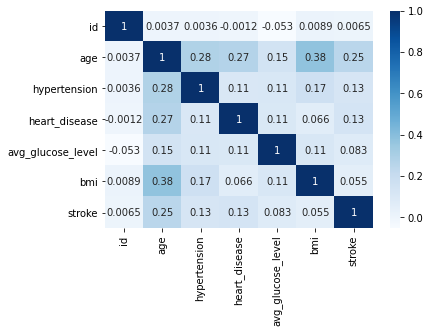

In [81]:
sns.heatmap(df.corr('spearman'), annot =True, cmap='Blues')

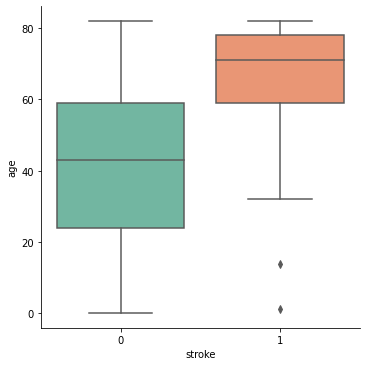

In [75]:
sns.catplot(x = 'stroke', y = 'age', kind='box', palette = 'Set2', data = df )

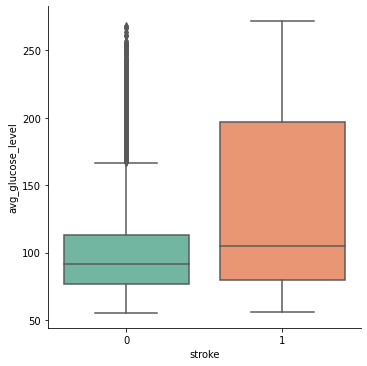

In [80]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', kind='box', palette = 'Set2', data = df )


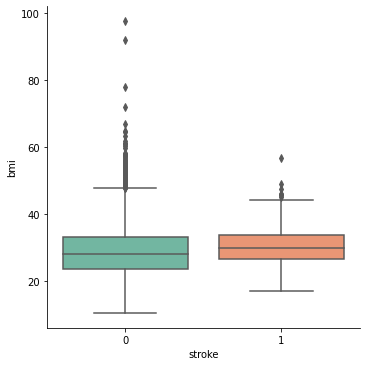

In [76]:
sns.catplot(x = 'stroke', y = 'bmi', kind='box', palette = 'Set2', data = df )


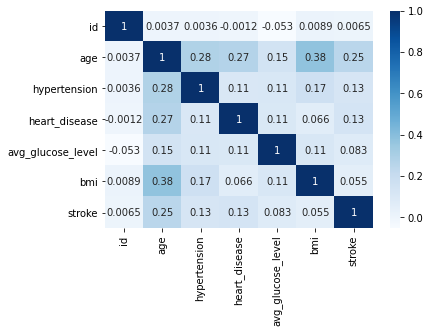

In [72]:
sns.heatmap(df.corr('spearman'), annot =True, cmap='Blues')

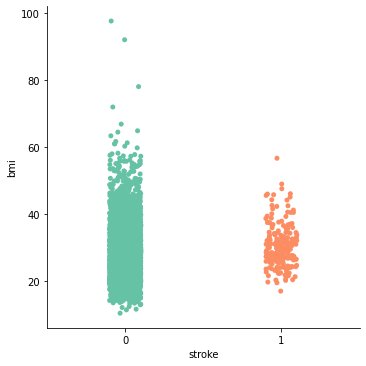

In [57]:
sns.catplot(x = 'stroke', y = 'bmi', hue='stroke', palette = 'Set2', data = df )


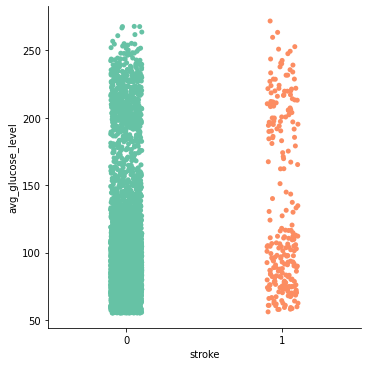

In [58]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )


3 - Realise as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do DataFrame como variáveis do modelo. 

4 - Apresente um gráfico 2D de dispersão dos dados de teste em relação à variável alvo. Nesteprocedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos X
e Y do gráfico. Para amostras com valor de "TARGET" 0 utilizar a cor azul; já para amostras de"TARGET" 1 utilizar vermelho.

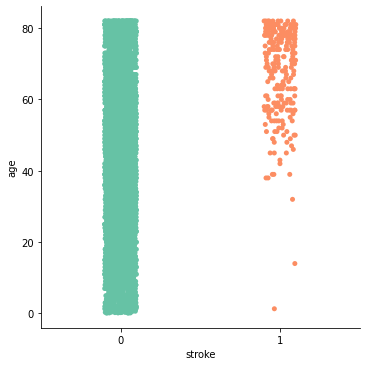

In [77]:
sns.catplot(x = 'stroke', y = 'age', hue='stroke', palette = 'Set2', data = df )

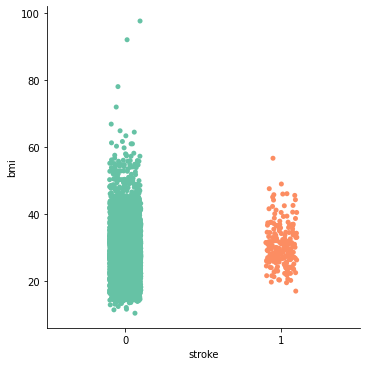

In [78]:
sns.catplot(x = 'stroke', y = 'bmi', hue='stroke', palette = 'Set2', data = df )


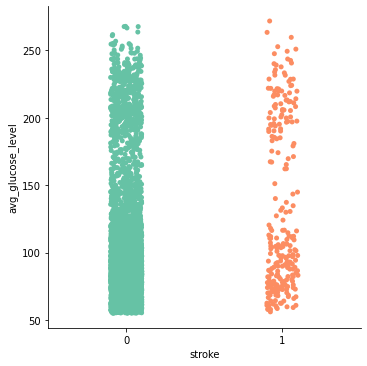

In [79]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )


5 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em árvore. Utilizeuma técnica de otimização de hiper-parametros a sua escolha.

6 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em redes neurais.Utilize uma técnica de otimização de hiper-parametros ou busca automática de rede a sua escolha.

7 - A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde queseja diferente das utilizadas nas questões 5 e 6.

8 - Compare os resultados dos tres modelos acima e justifique a métrica escolhida para avaliação

9 - Escolha um dos tres modelos acima. Supondo que um falso negativo tenha um custo muito maior doque falso positivo, e sabendo que a predição da variável alvo é realizada entre 0 e 1, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não umderrame e justique a sua escolha.

10 - Realize uma análise de "Equal Error Rate" e uma análise "SHAP" para o modelo a cima e descrevasuas conclusões.

11 - Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função depredição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição(0 ou 1) utilizando o limiar definido na questão 9.

12 - Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, deforma que possa ser utilizado para realizar predições em tempo real

13 - Escreva uma função que receba uma lista (array) de numeros inteiros e retorne um booleano (True ouFalse) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca,somente a linguagem Python com seus tipos nativos.def isMonotonic(A: List[int]) -> bool:<seu código aqui>